A **graphical model** is essentially a way of representing joint probability distribution over a set of random variables in a compact and intuitive form

2 main types:
1. Directed
2. Undirected

Generally, we use a **Bayesian Network** (directed graph) when there's a causal relationship between 2 RVs

### Probability Theory

Probability theory provides us the necessary tools to study uncertainty. 

#### Random Variable

A RV X is a function that maps a possible set of outcomes $\Omega$ to some set E, which is represented as follows:
$X: \Omega \rightarrow E$

RVs -> either discrete or continuous.

P(X) = Probability Distribution of X = set of values representing how probable each outcome of X is

**Example:** P(X = good) = 0.3, P(X = average) = 0.5 and P(X = bad) = 0.2 if X represents the quality of food in a restaurant.

#### Independence and conditional independence

Joint Probability Distribution -> when we look at multiple attributes simultaneously

**Example:**

P(Q = good, C = high) -> For a restaurant, this represents the probability that food quality is good and cost is high simultaneously

#### Conditional Probability Example (using restaurant example)

Generally: $P(C = high | L = good) \neq P(C = high)$ -> L = Location.
This means that C and L are not independent RVs

#### Independent RVs

A set of RVs ${X_1, X_2, ..., X_n}$ are **independent** of each other if:
$P(X_1, X_2, ..., X_n) = \prod_{i=1}^n P(X_i)$

#### Conditional Independence

Add a new RV, N -> No. of people visiting restaurant. From experience, we say that we know N only depends on C and L.
Does Q affect N? Well, Q affects C so indirectly it affects N too.
But if we know C is high, the answer is no because we know Q only depends on C and L.

### Conditional probability distribution (CPD)

**Example:**
  - Bag contains 3 apples, 5 oranges
  - Take 1 out of the bag at a time without replacement
  - RVs X_1, X_2 represent the outcomes on the first and second tries
  - First try: $P(X_1=apple) = 0.375$ and $P(X_1=orange) = 0.625$
  - The probabilities on the second try depend on the first try - so we use conditional probability to represent this
  - So, we have the following probabilities on the second try:
$P(X_2=apple | X_1=orange) = \frac{3}{7}$, $P(X_2=orange | X_1=orange) = \frac{4}{7}$, $P(X_2=apple | X_1=apple) = \frac{2}{7}$, $P(X_2=orange | X_2=apple) = \frac{5}{7}$

#### Tabular CPD

Table containing all the possible combinations of different states of the random variables and the probabilities corresponding to these states.

### Graph Theory

#### Nodes & Edges

Foundation of Graph Theory: Euler -> Bridges of Konigsberg

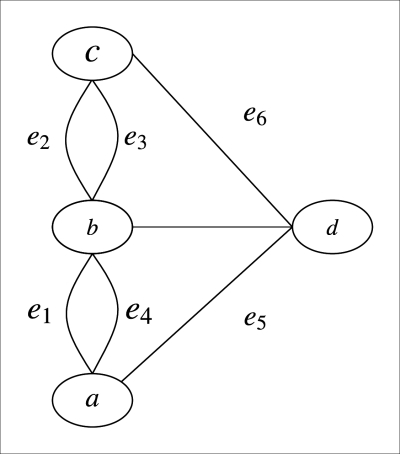

In [1]:
from IPython.display import Image
Image('https://www.safaribooksonline.com/library/view/mastering-probabilistic-graphical/9781784394684/graphics/B04016_01_60.jpg')

a, b, c, d -> the land and are **vertices**<br>
e1-e7 -> 7 bridges connecting the 4 vertices, these are **edges**<br>
**Problem:** Walk through the city, crossing each bridge once and only once. Euler proved this is impossible.

A **graph** $G = (V, E)$ is an ordered pair of finite sets<br>
V = set of nodes/vertices
$E \subseteq |V|^2$ = set of edges

Order of Graph = |V| = No. of vertices = Cardinality of G<br>
|E| = Size of Graph

2 Vertices **Adjacent** if an Edge joins them.<br>
$v \in V$ -> **neighbours set** of v is the set of vertices v is adjacent to.<br>
An edge is a **self loop** if it joins a vertex to itself.

**Undirected Graphs:** Edge (u, v) = (v, u) -> no sense of direction/order.<br>
**Directed Graphs:** There is a direction/order -> (u, v) and (v, u) are not the same.

For directed graphs, we have **indegree** and **outdegree** of a vertex, v.<br>
**Indegree:** No. of edges ending at v.<br>
**Outdegree:** No. of edges starting at v.

#### Walk, paths, and trails

Graph G = (V, E): **Walk** from vertex u to vertex v is an alternating sequence of vertices and edges, starting with u and ending with v.<br>
**Trail** = Walk with no repeated edges.<br>
**Path** = No repeated vertices (except possibly the first and last).<br>
**Cycle** = Path that starts and ends at the same node.<br>
**Cyclic** = Graph containing a cycle.<br>
**Acyclic** = Graph not containing a cycle.

### Bayesian Models

In a lot of real world scenarios, there would be many RVs. This makes for a large number of probability values and resulting issues with computation and computer memory.<br>
Exploiting independencies helps in the compact representation of joint probability distribution. This forms the basis for the Bayesian network.

#### Representation

Bayesian Network is represented as a **Directed Acyclic Graph (DAG)** and a set of **CPDs** in which:
- Nodes represent RVs
- Edges represent dependencies
- For each node, we have a CPD<br>
**Restaurant Example:** Nodes are:
- Food Quality (Q)
- Location (L)
- Cost (C)
- Number of people (N)

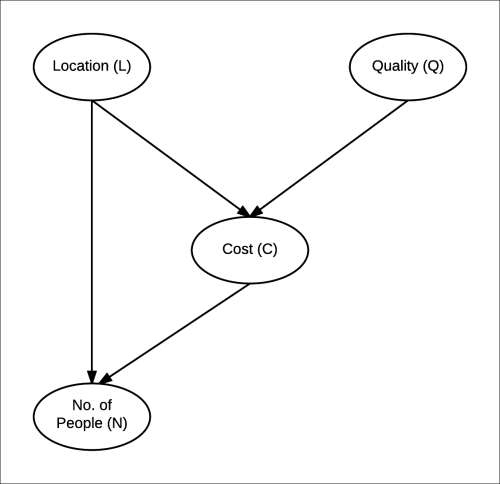

In [2]:
Image('https://www.safaribooksonline.com/library/view/mastering-probabilistic-graphical/9781784394684/graphics/B04016_01_62.jpg')

#### Factorization of a distribution over a network

Each node has a CPD, e.g. C has P(C|Q, L) -> C depends on Q and L.<br>
In general: **P(node|Par(node))** where Par denotes the parent nodes of a node.

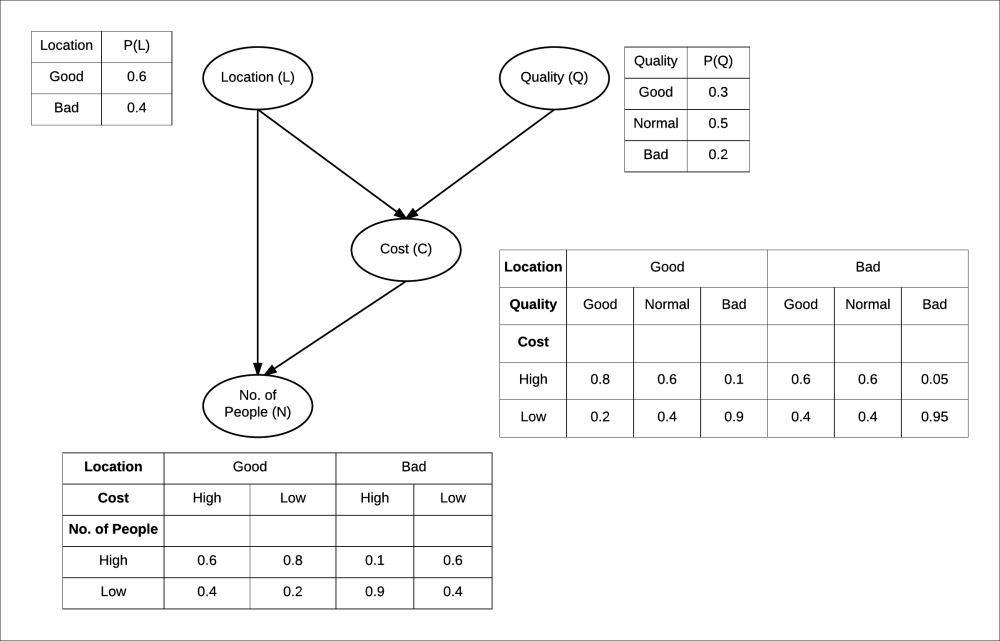

In [3]:
Image('https://www.safaribooksonline.com/library/view/mastering-probabilistic-graphical/9781784394684/graphics/B04016_01_63.jpg')

For the restaurant: $P(Q,C,L,N) = P(Q)P(L)P(C|Q, L)P(N|C, L)$<br>
In general: $P(X_1, X_2, ..., X_n) = \prod_{i=1}^n P(X_i|Par(X_i)) $ [Chain Rule for Bayesian Networks]<br>
<br>
We say that a distribution P factorizes over a graph G, if P can be encoded as follows:<br>
$P(X_1, X_2, ..., X_n) = \prod_{i=1}^n P(X_i|Par_G(X_i)) $

#### Reasoning Pattern in Bayesian Networks

We have the following nodes that we calculate the joint probability distribution for:
- Traffic accident = A
- Heavy rain = B
- Traffic jam = J
- Getting up late = G
- Long queues = Q
- Late to school = L

Then the joint probability distribution is:<br>
$P_j = P(A,R,JG,L,Q) = P(A)P(R)P(J|A,R)P(Q|J)P(L|G,J)$

Simple query: how likely is J if I know A = True - what is the value of P(J|A=True)?

We get P(J = True) = 0.416 and P(J = False) = 0.584.<br>
To compute P(J|A = True), we eliminate all A = False cases. This results in P(J = True|A = True) = 0.72 and P(J = False|A = True) = 0.28.<br>
So, knowing there is an accident increases the likelihood of a traffic jam.<br>
**The outcome of a parent in Bayesian Networks influences the probability of its children. This is called Causal Reasoning.**<br>
**Evidential reasoning:** where the observation of the outcomes of the children or effect influences the probability of parents or causes.<br>
**Intercausal reasoning**: where different causes with the same effect influence each other.

### D-Separation

2 types of connection in a Network:
- Direct
- Indirect

#### Direct

There is an edge $X \rightarrow Y$ in the graph G -> i.e. there is a direct connection.<br>
We can always find a probability distribution where they are dependent and there is never an independence condition.

#### Indirect

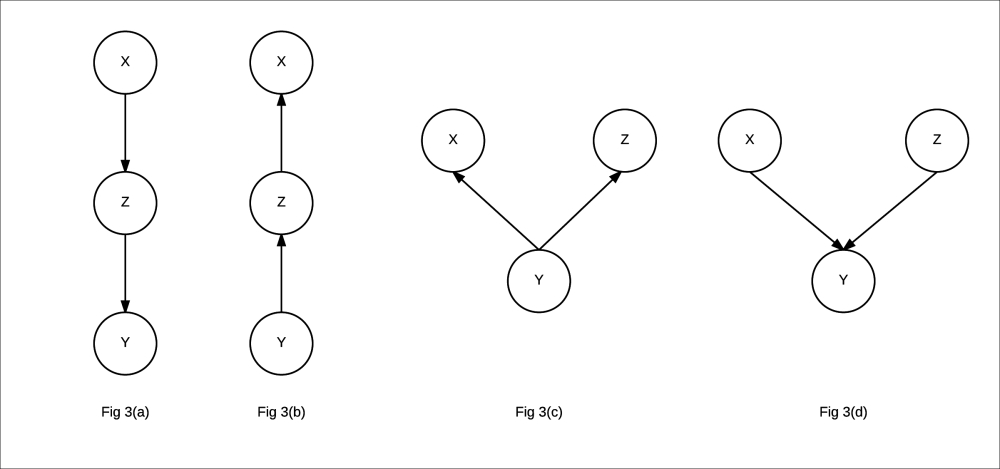

In [2]:
from IPython.display import Image
Image('https://www.safaribooksonline.com/library/view/mastering-probabilistic-graphical/9781784394684/graphics/B04016_01_65.jpg')

1. **Indirect causal effect, 3(a):** X affects Y indirectly via its effect on Z. But if we know the value of Z, then X may be conditionally independent of Y.
2. **Indirect evidential effect, 3(b):** If we know Y happened, then it increases the likelihood Z happened and therefore increased the likelihood of X. If we observe Z, then X and Y become independent.
3. **Common cause, 3(c):** Observing Y increases likelihood of X and Z. 
4. **Common effect, 3(d):** X and Z cause Y - X and Z occurring increases the likelihood of Y.

### Relating graphs and distributions

This section: we unify the concept of representing independencies of RVs as a Bayesian network and the concept of the Bayesian network being used to joint probability distribution over all RVs using Chain Rule.<br>
We also show that a probability distribution D can only be represented using a graph G if and only if D can be represented as a set of CPDs associated with the graph G.

#### IMAP

A graph object G is called an IMAP of a probability distribution D if the set of independency assertions in G, denoted by I(G), is a subset of the set of independencies in D, denoted by I(D).

**Perfect Map:** Graph, G, that can perfectly capture the independencies of a probability distribution, D.

#### IMAP to factorization

Every graph object has associated independencies with it. These independencies allow us to represent the joint probability distribution of the BN in a compact form.

### CPD representations

Tabular CPDs are not always the best choice to represent CPDs, e.g. continuous variables have infinite states and would be impossible to represent in tabular form.

#### Deterministic CPDs

Example where tabular CPD is a bad choice - when we have a deterministic RV - its value depends only on its parents' values in the model. For such a RV, X, we have:<br>
$P(X|Par(X)) = \begin{cases}
    1, & \text{if $x=f(Par(X))$}\\
    0, & \text{otherwise}.
  \end{cases}$

Here, $f:Val(Par(X)) \rightarrow Val(X)$

We can also see that having a deterministic variable gives up more information about the independencies in the network.

#### Context-specific CPDs

We can use a different representation depending on the context of a particular example.<br>
For example, in the Late for School model, if we have a **Flat Tire (F)** then we are going to be Late (L) no matter what. In a Tabular CPD, F=1 is always going to cause L=1 and this is half of the table.<br>
In such cases, we can use the Tree CPD or Rule CPD.

#### Tree CPD

In a Tree CPD, each leaf represents the various possible conditional distributions, and the path to the leaf represents the conditions for that distribution.

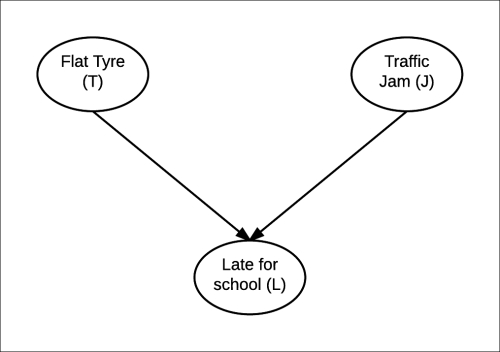

In [1]:
from IPython.display import Image
Image('https://www.safaribooksonline.com/library/view/mastering-probabilistic-graphical/9781784394684/graphics/B04016_01_67.jpg')

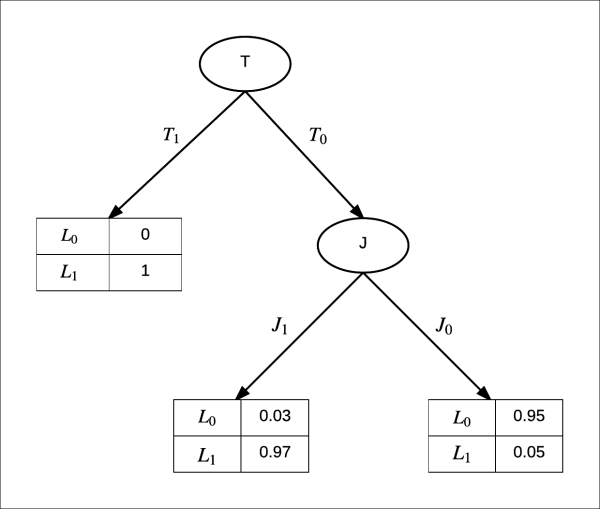

In [2]:
from IPython.display import Image
Image('https://www.safaribooksonline.com/library/view/mastering-probabilistic-graphical/9781784394684/graphics/B04016_01_68.jpg')

Instead of storing 4 values for the CPD in the Tabular case, in the Tree CPD we only store 3 values.

#### Rule CPD

A more explicit form of representation of CPDs - basically a set of rules along with the corresponding values of the variable.<br>
For the Flat Tire case, we have:<br>
$\rho_1: (T^1,L^0:0)$<br>
$\rho_2: (T^1,L^1:1)$<br>
$\rho_3: (T^0,J^1,L^0:0.95)$<br>
$\rho_4: (T^1,J^1,L^1:0.05)$<br>
$\rho_5: (T^0,J^0,L^0:0.03)$<br>
$\rho_6: (T^0,J^0,L^1:0.97)$<br>